In [1]:
#install and import the relevant libraries and packages
!conda install pytorch torchvision torchaudio -c pytorch -y
!pip install transformers requests beautifulsoup4 pandas numpy
!pip install torchvision 

import pandas as pd
import torch
import requests
from bs4 import BeautifulSoup
import re
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import statistics
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import display
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - pytorch
    - torchaudio
    - torchvision


The following NEW packages will be INSTALLED:

  _anaconda_depends  pkgs/main/win-64::_anaconda_depends-2022.10-py39_2 
  chardet            pkgs/main/win-64::chardet-4.0.0-py39haa95532_1003 
  idna               pkgs/main/win-64::idna-3.4-py39haa95532_0 
  requests           pkgs/main/win-64::requests-2.28.1-py39haa95532_0 
  urllib3            pkgs/main/win-64::urllib3-1.26.14-py39haa95532_0 

The following packages will be UPDATED:

  ca-certificates                     2022.07.19-haa95532_0 --> 2023.01.10-haa95532_0 
  certifi                          2022.9.14-py39haa95532_0 --> 2022.12.7-py39haa95532_0 
  openssl                                 1.1.1q-h2bbff1b_0 --> 1.1.1t-h2bbff1b_0 

The following packages will be DOWNGRADED:

  anaconda                                   2022.10-py39_0 --> cust


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2022.10=py39_0
  - defaults/win-64::anaconda-client==1.11.0=py39haa95532_0
  - defaults/win-64::anaconda-navigator==2.3.2=py39haa95532_0
  - defaults/win-64::anaconda-project==0.11.1=py39haa95532_0
  - defaults/win-64::anyio==3.5.0=py39haa95532_0
  - defaults/noarch::binaryornot==0.4.4=pyhd3eb1b0_1
  - defaults/win-64::boto3==1.24.28=py39haa95532_0
  - defaults/win-64::botocore==1.27.28=py39haa95532_0
  - defaults/win-64::colorcet==3.0.0=py39haa95532_0
  - defaults/win-64::conda==23.1.0=py39haa95532_0
  - defaults/win-64::conda-build==3.22.0=py39haa95532_0
  - defaults/win-64::conda-repo-cli==1.0.20=py39haa95532_0
  - defaults/noarch::conda-token==0.4.0=pyhd3eb1b0_0
  - defaults/noarch::cookiecutter==1.7.3=pyhd3eb1b0_0
  - defaults/win-64::dask==2022.7.0=py39haa95532_0
  - defaults/win-64::datashader==0.14.1=py39haa95532_0
  - d

In [10]:
class ProductReviews:
    """A class to represent a set of product reviews.
    Attributes:
    -----------
    df : pandas.DataFrame
        The dataframe containing the product reviews.

    Methods:
    --------
    create_histogram(title)
        Creates a histogram of the product ratings and displays it.
    mean()
        Calculates the mean of the product ratings.

    mode()
        Calculates the mode of the product ratings.

    median()
        Calculates the median of the product ratings.

    standard_deviation()
        Calculates the standard deviation of the product ratings.

    variance()
        Calculates the variance of the product ratings.

    """
    def __init__(self, csv_file):
        """Initialize a new ProductReviews object.

        Parameters:
        -----------
        csv_file : str
            The path to the CSV file containing the product reviews.

        """
        self.df = pd.read_csv(csv_file)

    def create_histogram(self, title, subplot_idx):
        """Create a histogram of the product ratings and display it.

        Parameters:
        -----------
        title : str
            The title to display above the histogram.
        subplot_idx: int
            The index of the subplot to plot the histogram in

        Returns:
        --------
        None

        """
        fig = px.histogram(self.df, x="rating")
        fig.update_traces(marker_color="steelblue", marker_line_color='rgb(8,48,107)',
                          marker_line_width=1.5)
        fig.update_layout(title_text=title)

        row = subplot_idx // 3 + 1
        col = subplot_idx % 3 + 1

        return (fig, row, col)
    
    def mean(self):
        """Calculate the mean of the product ratings."""
        return round(statistics.mean(self.df['rating']), 2)

    def mode(self):
        """Calculate the mode of the product ratings."""
        return statistics.mode(self.df['rating'])

    def median(self):
        """Calculate the median of the product ratings."""
        return round(statistics.median(self.df['rating']), 2)

    def standard_deviation(self):
        """Calculate the standard deviation of the product ratings."""
        return round(statistics.stdev(self.df['rating']), 2)

    def variance(self):
        """Calculate the variance of the product ratings."""
        return round(statistics.variance(self.df['rating']), 2)


#Create instances of the ProductReviews class for each product
grindr_reviews = ProductReviews('grindr_reviews.csv')
scruff_reviews = ProductReviews('scruff_reviews.csv')
hornet_reviews = ProductReviews('hornet_reviews.csv')
tinder_reviews = ProductReviews('tinder_reviews.csv')
badoo_reviews = ProductReviews('badoo_reviews.csv')
bumble_reviews = ProductReviews('bumble_reviews.csv')

# Initialize the subplot grid
fig = make_subplots(rows=2, cols=3, subplot_titles=("Grindr Product Ratings", "Scruff Product Ratings", "Hornet Product Ratings",
                                                    "Tinder Product Ratings", "Badoo Product Ratings", "Bumble Product Ratings"))

#Use the create_histogram method of each instance to create a histogram of the product ratings
histograms = [grindr_reviews.create_histogram('Grindr Product Ratings', 0),
              scruff_reviews.create_histogram('Scruff Product Ratings', 1),
              hornet_reviews.create_histogram('Hornet Product Ratings', 2),
              tinder_reviews.create_histogram('Tinder Product Ratings', 3),
              badoo_reviews.create_histogram('Badoo Product Ratings', 4),
              bumble_reviews.create_histogram('Bumble Product Ratings', 5)]

# Add each histogram to the subplot grid
for histogram in histograms:
    fig.add_trace(histogram[0]['data'][0], row=histogram[1], col=histogram[2])

# Update the subplot layout
fig.update_layout(height=600, width=900, title_text="Product Ratings")

# Display the subplot grid
fig.show()

stats_dict = {
    'Product': ['Grindr', 'Scruff', 'Hornet', 'Tinder', 'Badoo', 'Bumble'],
    'Mean': [grindr_reviews.mean(), scruff_reviews.mean(), hornet_reviews.mean(), tinder_reviews.mean(), badoo_reviews.mean(), bumble_reviews.mean()],
    'Mode': [grindr_reviews.mode(), scruff_reviews.mode(), hornet_reviews.mode(), tinder_reviews.mode(), badoo_reviews.mode(), bumble_reviews.mode()],
    'Median': [grindr_reviews.median(), scruff_reviews.median(), hornet_reviews.median(), tinder_reviews.median(), badoo_reviews.median(), bumble_reviews.median()],
    'Standard Deviation': [grindr_reviews.standard_deviation(), scruff_reviews.standard_deviation(), hornet_reviews.standard_deviation(), tinder_reviews.standard_deviation(), badoo_reviews.standard_deviation(), bumble_reviews.standard_deviation()],
    'Variance': [grindr_reviews.variance(), scruff_reviews.variance(), hornet_reviews.variance(), tinder_reviews.variance(), badoo_reviews.variance(), bumble_reviews.variance()]
}

# Create a pandas DataFrame from the dictionary
stats_df = pd.DataFrame(stats_dict)

# Display the DataFrame
display(stats_df)

,Product,Mean,Mode,Median,Standard Deviation,Variance
0,Grindr,2.44,1,2.0,1.60,2.57
1,Scruff,3.29,5,4.0,1.70,2.91
2,Hornet,3.51,5,4.0,1.63,2.67
3,Tinder,1.54,1,1.0,1.09,1.20
4,Badoo,3.56,5,4.0,1.66,2.77
5,Bumble,2.34,1,2.0,1.47,2.15


C:\Users\gabri\AppData\Local\Temp\ipykernel_7352\1759285307.py:65: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



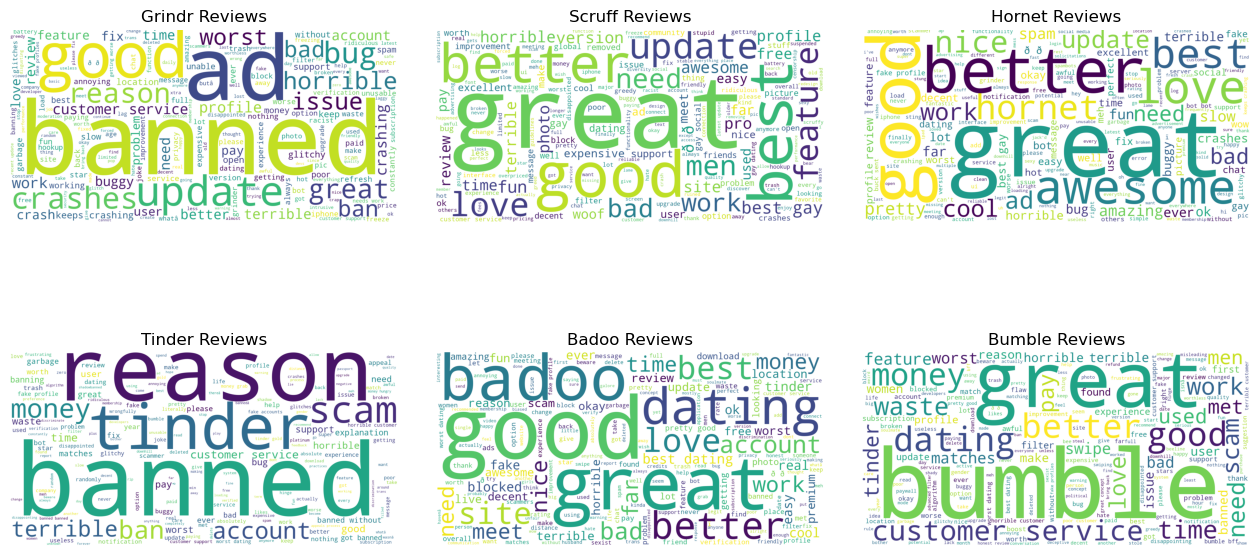

In [25]:
class WordCloudGenerator:
    def __init__(self, file_path, new_stopwords):
        self.df = pd.read_csv(file_path, encoding="latin-1")
        self.comment_words = ''
        self.stopwords = nltk.corpus.stopwords.words('english')
        self.stopwords.extend(new_stopwords)

    def generate_word_cloud(self, ax, title):
        word_count = {}
        # iterate through the csv file and split the string into single words
        for val in self.df.title:
            # typecast each val to string
            val = str(val)

            # split the value
            tokens = val.split()

            # Converts each token into lowercase
            for i in range(len(tokens)):
                tokens[i] = tokens[i].lower()

            self.comment_words += " ".join(tokens) + " "

        # define the parameters for the wordcloud graph
        wordcloud = WordCloud(width=1600, height=800,
                              background_color='white',
                              stopwords=self.stopwords,
                              min_font_size=10).generate(self.comment_words)

        # plot the WordCloud image
        ax.imshow(wordcloud)
        ax.axis("off")
        ax.set_title(title)


new_stopwords = ["grindr", "dona", "t", "ita", "ia", "a", "m",
                 "donâ", "t", "itâ", "iâ", "â", "app", "canâ",
                 "get", "even", "really", "said", "also", "phone", "wonâ",
                 "thatâ", "youâ", "know", "scruff", "like", "would", "still",
                 "much", "use", "apps", "guy", "guys", "people", "didnâ", "look",
                 "see", "many", "u", "could", "way", "something", "i'm", "say",
                 "one", "though", "new", "doesnâ"]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 8), facecolor=None, 
                        gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

grindr_wc = WordCloudGenerator("grindr_reviews.csv", new_stopwords)
grindr_wc.generate_word_cloud(axs[0][0], "Grindr Reviews")

scruff_wc = WordCloudGenerator("scruff_reviews.csv", new_stopwords)
scruff_wc.generate_word_cloud(axs[0][1], "Scruff Reviews")

hornet_wc = WordCloudGenerator("hornet_reviews.csv", new_stopwords)
hornet_wc.generate_word_cloud(axs[0][2], "Hornet Reviews")

tinder_wc = WordCloudGenerator("tinder_reviews.csv", new_stopwords)
tinder_wc.generate_word_cloud(axs[1][0], "Tinder Reviews")

badoo_wc = WordCloudGenerator("badoo_reviews.csv", new_stopwords)
badoo_wc.generate_word_cloud(axs[1][1], "Badoo Reviews")

bumble_wc = WordCloudGenerator("bumble_reviews.csv", new_stopwords)
bumble_wc.generate_word_cloud(axs[1][2], "Bumble Reviews")

plt.tight_layout(pad=0)
plt.savefig('wordcloud.png', dpi=300)
plt.show()

In [15]:
class SentimentAnalyzer:
    """
    Class for sentiment analysis using BERT-based model.
    Args:
    model_name (str): Name of the pre-trained BERT-based model to be used. Default is 'nlptown/bert-base-multilingual-uncased-sentiment'.

    Attributes:
    tokenizer: Instance of the AutoTokenizer class from transformers package for tokenizing input text.
    model: Instance of the AutoModelForSequenceClassification class from transformers package for sentiment analysis.

    Methods:
    sentiment_score(review): Method for calculating sentiment score of a given review text using the pre-trained model.
    """
    def __init__(self, model_name='nlptown/bert-base-multilingual-uncased-sentiment'):
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModelForSequenceClassification.from_pretrained(model_name)

    def sentiment_score(self, review):
        """
        Method to calculate sentiment score of a given review text.

        Args:
        review (str): Text of the review to be analyzed.

        Returns:
        Integer: Sentiment score of the input review text (1-5).
        """
        tokens = self.tokenizer.encode(review, return_tensors='pt')
        result = self.model(tokens)
        return int(torch.argmax(result.logits)) + 1

class ReviewSentimentAnalyzer:
    """
    Class for sentiment analysis of a collection of reviews using BERT-based model.
    Args:
    model_name (str): Name of the pre-trained BERT-based model to be used. Default is 'nlptown/bert-base-multilingual-uncased-sentiment'.

    Attributes:
    analyzer: Instance of the SentimentAnalyzer class for sentiment analysis of individual reviews.

    Methods:
    analyze_reviews(review_csv_file_path): Method for analyzing sentiment of a collection of reviews given in a CSV file.
    """

    def __init__(self, model_name='nlptown/bert-base-multilingual-uncased-sentiment'):
        self.analyzer = SentimentAnalyzer(model_name)
        
    def analyze_reviews(self, review_csv_file_path):
        """
        Method for analyzing sentiment of a collection of reviews given in a CSV file.

        Args:
        review_csv_file_path (str): File path of the CSV file containing the reviews.

        Returns:
        DataFrame: Pandas DataFrame object containing the reviews along with their sentiment scores.
        """
        df = pd.read_csv(review_csv_file_path)
        df['sentiment'] = df['review'].apply(lambda x: self.analyzer.sentiment_score(x[:512]))
        return df

class SentimentStatistics:
    """
    Class for calculating statistics from sentiment ratings.
    Args:
    sentiment_ratings (list): List of integer sentiment ratings (1-5).

    Attributes:
    sentiment_ratings: List of integer sentiment ratings (1-5).

    Methods:
    mean(): Method for calculating the mean of the sentiment ratings.
    mode(): Method for calculating the mode of the sentiment ratings.
    median(): Method for calculating the median of the sentiment ratings.
    std(): Method for calculating the standard deviation of the sentiment ratings.
    variance(): Method for calculating the variance of the sentiment ratings.
    """
    def __init__(self, sentiment_ratings):
        self.sentiment_ratings = sentiment_ratings
    
    def mean(self):
        """
        Method to calculate the mean of the sentiment ratings.

        Returns:
        float: Mean of the sentiment ratings.
        """
        return round(statistics.mean(self.sentiment_ratings), 2)
    
    def mode(self):
        """
        Method to calculate the mode of the sentiment ratings.

        Returns:
        tuple: Mode of the sentiment ratings.
        """
        return round(statistics.mode(self.sentiment_ratings), 2)
    
    def median(self):
        """
        Method to calculate the median of the sentiment ratings.

        Returns:
        float: Median of the sentiment ratings.
        """
        return round(statistics.median(self.sentiment_ratings), 2)
    
    def std(self):
        """
        Method to calculate the standard deviation of the sentiment ratings.

        Returns:
        float: Standard deviation of the sentiment ratings.
        """
        return round(statistics.stdev(self.sentiment_ratings), 2)
    
    def variance(self):
        """
        Method to calculate the variance of the sentiment ratings.

        Returns:
        float: Variance of the sentiment ratings.
        """
        return round(statistics.variance(self.sentiment_ratings), 2)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
analyzer = SentimentAnalyzer('nlptown/bert-base-multilingual-uncased-sentiment')

#Load reviews from a CSV file into a pandas dataframe
hornet_reviews = pd.read_csv('hornet_reviews.csv')
#Add a new column called 'sentiment' to the dataframe by applying the sentiment_score method to the 'review' column
#The sentiment_score method uses a BERT model to predict the sentiment of the text, but only uses the first 512 characters
hornet_reviews['sentiment'] = df['review'].apply(lambda x: sentiment_score(x[:512]))
#Save the dataframe with the added sentiment column to a new CSV file
#The index column is excluded by setting index=False
hornet_reviews.to_csv('sentiment_hornet.csv', index=False)

grindr_reviews = pd.read_csv('grindr_reviews.csv')
grindr_reviews['sentiment'] = grindr_reviews['review'].apply(lambda x: analyzer.sentiment_score(x[:512]))
grindr_reviews.to_csv('sentiment_grindr.csv', index=False)

scruff_reviews = pd.read_csv('scruff_reviews.csv')
scruff_reviews['sentiment'] = scruff_reviews['review'].apply(lambda x: analyzer.sentiment_score(x[:512]))
scruff_reviews.to_csv('sentiment_scruff.csv', index=False)

tinder_reviews = pd.read_csv('tinder_reviews.csv')
tinder_reviews['sentiment'] = tinder_reviews['review'].apply(lambda x: analyzer.sentiment_score(x[:512]))
tinder_reviews.to_csv('sentiment_tinder.csv', index=False)

badoo_reviews = pd.read_csv('badoo_reviews.csv')
badoo_reviews['sentiment'] = badoo_reviews['review'].apply(lambda x: analyzer.sentiment_score(x[:512]))
badoo_reviews.to_csv('sentiment_badoo.csv', index=False)

bumble_reviews = pd.read_csv('bumble_reviews.csv')
bumble_reviews['sentiment'] = bumble_reviews['review'].apply(lambda x: analyzer.sentiment_score(x[:512]))
bumble_reviews.to_csv('sentiment_bumble.csv', index=False)

In [16]:
# Define a list of products
products = ['Hornet', 'Grindr', 'Scruff', 'Badoo', 'Tinder', 'Bumble']

# Create an empty DataFrame to store the statistics
stats_df = pd.DataFrame(columns=['Product', 'Mean', 'Mode', 'Median', 'Standard Deviation', 'Variance'])

# Iterate over the products and calculate the statistics for each one
for product in products:
    sentiment_ratings = pd.read_csv(f'sentiment_{product.lower()}.csv')['sentiment'].tolist()
    product_stats = SentimentStatistics(sentiment_ratings)
    stats = {
        'Product': product,
        'Mean': product_stats.mean(),
        'Mode': product_stats.mode(),
        'Median': product_stats.median(),
        'Standard Deviation': product_stats.std(),
        'Variance': product_stats.variance()
    }
    stats_df = pd.concat([stats_df, pd.DataFrame(stats, index=[0])], ignore_index=True)

# Print the table of statistics
display(stats_df)


,Product,Mean,Mode,Median,Standard Deviation,Variance
0,Hornet,3.42,5,4.0,1.57,2.47
1,Grindr,1.95,1,1.0,1.32,1.75
2,Scruff,3.03,5,3.0,1.59,2.51
3,Badoo,3.04,1,3.0,1.57,2.45
4,Tinder,1.60,1,1.0,1.06,1.13
5,Bumble,2.19,1,2.0,1.28,1.65
